<a href="https://colab.research.google.com/github/captainbluebear/GEOL0069-ML-Inland-Water-Body-Detection/blob/main/ML_Detection_of_Inland_Water_Bodies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection of Inland Water Bodies Using Machine Learning

The goal of this notebook is to use unsupervised classification to detect and extract inland water bodies from satellite imagery. We will use SENTINEL-2 data due to its high resolution. The algorithm used is k-means classification.

For the purposes of this notebook, two locations are being evaluated which correspond to two separate datasets. One location is in the Great Lakes region of North America, chosen for its high density of small lakes and rivers. The other region is centered on the Ganges Delta, chosen for the silt-laden water which traditional methods of detection often miscategorise.


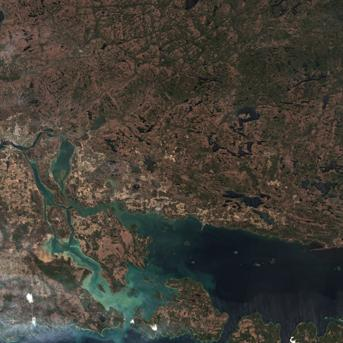
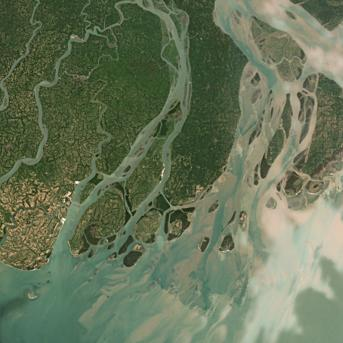

## Notebook Requirements
For the code in this notebook to work, the `rasterio` package needs to be installed, which a GDAL and Numpy-based Python library that is designed to read geospatial raster data such as that from SENTINEL-2. The block below will install rasterio for you.

In [ ]:
! pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.8 MB/s eta 0:00:00


The base file paths to the datasets used in this project are established below and will be used for the entirety of this notebook. Change these paths to match those on your machine.

Also note that any filenames found throughout this notebook are dataset-specific and will need to be modified accordingly if you are not using the Great Lakes and Ganges datasets.

In [ ]:
# Specify file paths to the bands being used for Great Lakes region.
gl_base_path = "/content/drive/MyDrive/UMD/Spring 24 UCL/GEOL0069/Final Project/DATA/SEN2_L2A_great_lakes/GRANULE/L2A_T16TGS_A037289_20240426T163427/IMG_DATA/"

# Specify file paths to the bands being used for Ganges region
m_base_path = "/content/drive/MyDrive/UMD/Spring 24 UCL/GEOL0069/Final Project/DATA/SEN2_L2A_ganges/GRANULE/L2A_T46QBK_A046033_20240415T043016/IMG_DATA/"

# Creating a Benchmark: Normalized Difference Water Index (NDWI)
The NDWI is used to monitor changes in water content in water bodies. It was proposed in 1996 by S.K. McFeeters and has been widely adopted. The NDWI is calculated as follows:
$$\text{NDWI} = \frac{\text{Green} - \text{NIR}}{\text{Green} + \text{NIR}}.$$
In the context of SENTINEL-2 bands, B03 is green light and B08 is NIR. Values greater than 0.5 typically correspond to water bodies. Vegetation corresponds to much smaller values and built-up areas to values in the range of 0-0.2.

For this particular data, the NDWI index appears to be shifted towards smaller values. As a result, the threshold in use is 0.0 to compensate.




## Great Lakes NDWI
Importing the data needed from SEN-2 (bands 03 and 08), as well as calculating NDWI according the the formula given and thresholding the value to acquire a mask of water to non-water values. Water is represented as 1, and nonwater values represented as 0.




In [ ]:
import rasterio
import numpy as np

# Specify file paths to the bands being used
gl_bands_paths = {
    'B8': gl_base_path + 'R10m/T16TGS_20240426T162829_B08_10m.jp2',
    'B3': gl_base_path + 'R10m/T16TGS_20240426T162829_B03_10m.jp2',
}

# Read and stack the band images
gl_band_data = []
for band in ['B3', 'B8']:
    with rasterio.open(gl_bands_paths[band]) as src:
        gl_band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
gl_band_stack = np.dstack(gl_band_data)
gl_valid_data_mask = np.all(gl_band_stack > 0, axis=2)


# Calculating the NDWI
gl_green_band = gl_band_stack[:,:,0].astype(np.float16)
gl_nir_band = gl_band_stack[:,:,1].astype(np.float16)

gl_ndwi = (gl_green_band-gl_nir_band)/(gl_green_band+gl_nir_band)

# Thresholding the NDWI
threshold = 0.0 # Threshold value
gl_mask_ndwi = np.where(gl_ndwi > threshold, 1, 0).astype(np.uint8)

Plotting the mask:

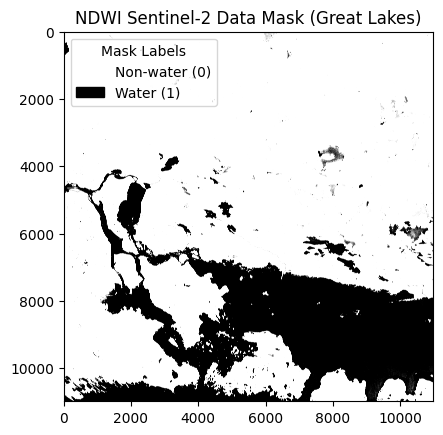

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create legend
patches = [
    Rectangle((0, 0), 1, 1, color=plt.cm.binary(0)),  # Patch for color at vmin
    Rectangle((0, 0), 1, 1, color=plt.cm.binary(0.99)),  # Patch for color at vmax
]
labels = ['Non-water (0)', 'Water (1)']
plt.legend(patches, labels, loc='upper left', title='Mask Labels')


# Plotting the result
plt.imshow(gl_mask_ndwi, cmap='binary')
plt.title('NDWI Sentinel-2 Data Mask (Great Lakes)')
plt.show()

## Ganges NDWI
Importing the data needed from SEN-2 (bands 03 and 08), as well as calculating NDWI according the the formula given and thresholding the value to acquire a mask of water to non-water values. Water is represented as 1, and nonwater values represented as 0.




In [ ]:
import rasterio
import numpy as np

# Specify file paths to the bands being used
m_bands_paths = {
    'B8': m_base_path + 'R10m/T46QBK_20240415T042711_B08_10m.jp2',
    'B3': m_base_path + 'R10m/T46QBK_20240415T042711_B03_10m.jp2',
}

# Read and stack the band images
m_band_data = []
for band in ['B3', 'B8']:
    with rasterio.open(m_bands_paths[band]) as src:
        m_band_data.append(src.read(1))

# Stack bands
m_band_stack = np.dstack(m_band_data)


# Calculating the NDWI
m_green_band = m_band_stack[:,:,0].astype(np.float16)
m_nir_band = m_band_stack[:,:,1].astype(np.float16)

m_ndwi = (m_green_band-m_nir_band)/(m_green_band+m_nir_band)

# Thresholding the NDWI
threshold = 0.0 # Threshold value
m_mask_ndwi = np.where(m_ndwi > threshold, 1, 0).astype(np.uint8)

Calculating NDWI according the the formula given, as well as thresholding the value to acquire a mask of water to non-water values. Water is represented as 1, and nonwater values represented as 0.

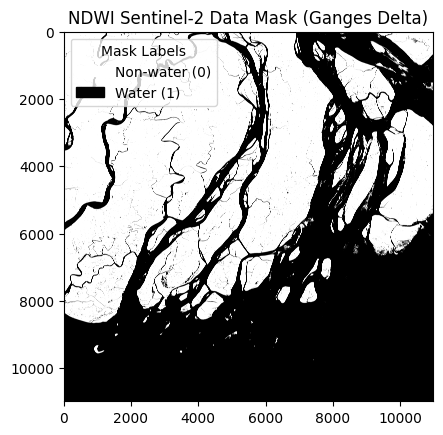

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create legend
patches = [
    Rectangle((0, 0), 1, 1, color=plt.cm.binary(0)),  # Patch for color at vmin
    Rectangle((0, 0), 1, 1, color=plt.cm.binary(0.99)),  # Patch for color at vmax
]
labels = ['Non-water (0)', 'Water (1)']
plt.legend(patches, labels, loc='upper left', title='Mask Labels')

# Plotting the result
plt.imshow(m_mask_ndwi, cmap='binary')
plt.title('NDWI Sentinel-2 Data Mask (Ganges Delta)')
plt.show()

# K-means Clustering Algorithm

K-means is particularly well-suited for applications where the structure of the data is not known. Because K-means does not require any knowledge or input about the data, it is ideal for exploratory analysis. This makes it an ideal choice for this project.

## Great Lakes Region
For the Great Lakes region, k-means is run twice on different pairs of bands. The first approach utilises the bands used in the NDWI, while the second approach uses evidence from a study proposing an index called the SWI.

### NDWI Bands: 03 and 08
For this implementation of k-means, data taken from bands 3 and 8 at 10m resolution is being used. They correspond to green (03) and NIR (08).

These bands contain data corresponding to that used in calculating the NDWI. A k-means algorithmic approach on the same bands is taken to see if machine learning can improve upon the purely index-based method.

This is the data being read in as a usable format.

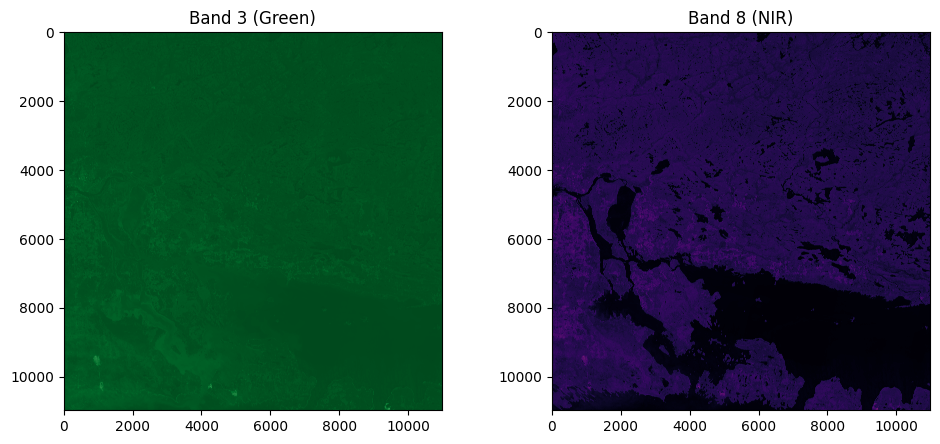

In [ ]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Specify file paths to the bands being used
gl_bands_paths = {
    'B8': gl_base_path + 'R10m/T16TGS_20240426T162829_B08_10m.jp2',
    'B3': gl_base_path + 'R10m/T16TGS_20240426T162829_B03_10m.jp2'
}

# Read and stack the band images
gl_band_data = []
for band in ['B3', 'B8']:
    with rasterio.open(gl_bands_paths[band]) as src:
        gl_band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
gl_band_stack = np.dstack(gl_band_data)
gl_valid_data_mask = np.all(gl_band_stack > 0, axis=2)

# Visual Plot of Bands

fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(gl_band_stack[:,:,0], cmap='BuGn_r')  # Plot on the first subplot (ax1)
ax1.set_title('Band 3 (Green)')

ax2.imshow(gl_band_stack[:,:,1], cmap= 'inferno')  # Plot on the second subplot (ax2)
ax2.set_title('Band 8 (NIR)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

The K-means algorithm is calculated below. Two clusters are used to fit the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


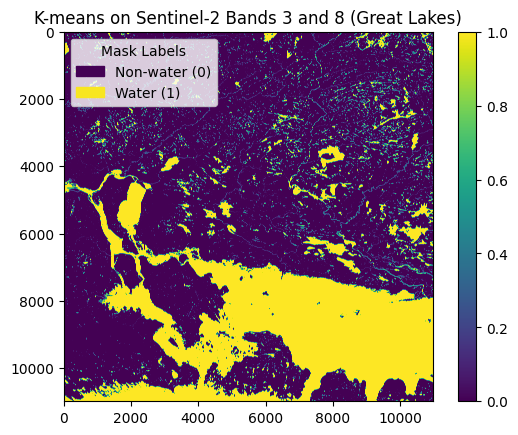

In [ ]:
# Reshape for K-means, only including valid data
gl_X = gl_band_stack[gl_valid_data_mask].reshape((-1, 2))

# K-means clustering
gl_kmeans = KMeans(n_clusters=2, random_state=0).fit(gl_X)
gl_labels = gl_kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
gl_labels_image_traditional = np.full(gl_band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
gl_labels_image_traditional[gl_valid_data_mask] = gl_labels

# Plotting the result
# Create legend
patches = [
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0)),  # Patch for color at vmin
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0.99)),  # Patch for color at vmax
]
labels = ['Non-water (0)', 'Water (1)']
plt.legend(patches, labels, loc='upper left', title='Mask Labels')

# Displaying Image
plt.imshow(gl_labels_image_traditional, cmap='viridis')
plt.title('K-means on Sentinel-2 Bands 3 and 8 (Great Lakes)')
plt.colorbar()
plt.show()

### SENTINEL-2 Water Index (SWI) Bands: 05 and 11
For this implementation of the k-means algorithm, data was taken from bands 05 and 11 at 20m resolution. These correspond to Vegetation Red Edge and SWIR (Short Wave Infared Spectral Range).

A 2020 paper by Jiang et al. proposed a new type of water index based upon these two bands and saw improved performance over the NDWI. This paper specifically examined SENTINEL-2 data and strove to fully utilise its unique bands to best extract water bodies. Due to the improved performance of the SWI, the bands used to calculate it will be utilised here in a comparison with more traditional bands.

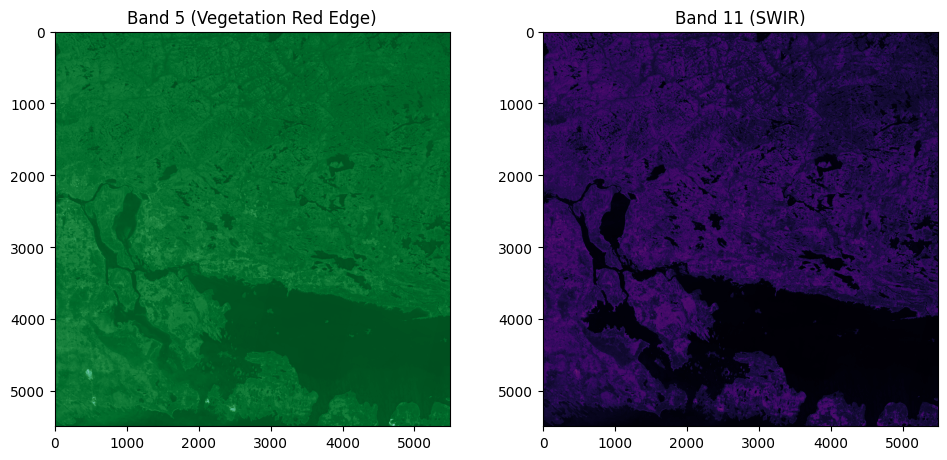

In [ ]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Specify file paths to the bands being used
gl_bands_paths = {
    'B5': gl_base_path + 'R20m/T16TGS_20240426T162829_B05_20m.jp2',
    'B11': gl_base_path + 'R20m/T16TGS_20240426T162829_B11_20m.jp2'
}

# Read and stack the band images
gl_band_data = []
for band in ['B5', 'B11']:
    with rasterio.open(gl_bands_paths[band]) as src:
        gl_band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
gl_band_stack = np.dstack(gl_band_data)
gl_valid_data_mask = np.all(gl_band_stack > 0, axis=2)

# Visualisation of bands being used
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(gl_band_stack[:,:,0], cmap='BuGn_r')  # Plot on the first subplot (ax1)
ax1.set_title('Band 5 (Vegetation Red Edge)')

ax2.imshow(gl_band_stack[:,:,1], cmap= 'inferno')  # Plot on the second subplot (ax2)
ax2.set_title('Band 11 (SWIR)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

The K-means algorithm is calculated below. Three clusters are used to fit the data. When the mask is created, the two clusters which do not represent water are flattened for simplicity.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


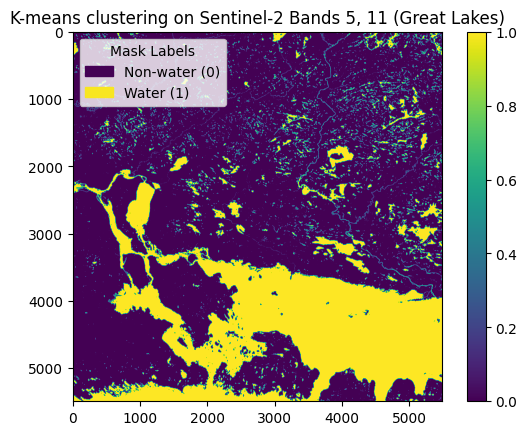

In [ ]:
# Reshape for K-means, only including valid data
gl_X = gl_band_stack[gl_valid_data_mask].reshape((-1, 2))

# K-means clustering
gl_kmeans = KMeans(n_clusters=3, random_state=0).fit(gl_X)
gl_labels = gl_kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
gl_labels_image_swi = np.full(gl_band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
gl_labels_image_swi[gl_valid_data_mask] = gl_labels

# Simplifying labels so that we only have water and non-water
gl_labels_image_swi_flattened = np.where(gl_labels_image_swi >= 1, 0, 1)


# Plotting the result
# Create legend
patches = [
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0)),  # Patch for color at vmin
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0.99)),  # Patch for color at vmax
]
labels = ['Non-water (0)', 'Water (1)']
plt.legend(patches, labels, loc='upper left', title='Mask Labels')

# Displaying Image
plt.imshow(gl_labels_image_swi_flattened, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands 5, 11 (Great Lakes)')
plt.colorbar()
plt.show()

## Great Lakes Performance Analysis
We will use a confusion matrix to evaluate the performance of the machine learning algorithms in comparison to the traditional NDWI index. Note that this comparison does not reflect overall accuracy of boundary conditions for the water bodies; it is simply a comparison against traditional methods. To evaluate overall extraction performance, visual discrimination or classified reference images are required.

### NDWI Band Evaluation

Side by side comparison of the two masks for visual reference:

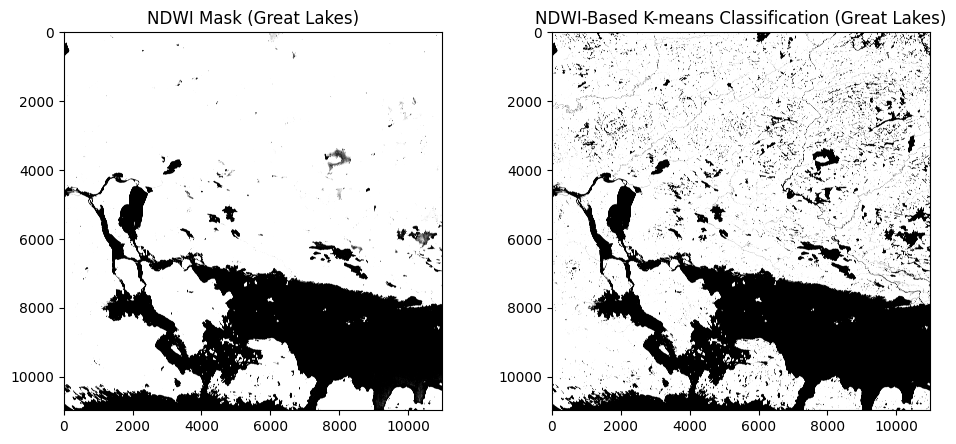

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(gl_mask_ndwi, cmap='binary')  # Plot on the first subplot (ax1)
ax1.set_title('NDWI Mask (Great Lakes)')

ax2.imshow(gl_labels_image_traditional, cmap= 'binary')  # Plot on the second subplot (ax2)
ax2.set_title('NDWI-Based K-means Classification (Great Lakes)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

Calculation of confusion matrix.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97  93850484
           1       0.82      0.99      0.90  26709916

    accuracy                           0.95 120560400
   macro avg       0.91      0.97      0.93 120560400
weighted avg       0.96      0.95      0.95 120560400



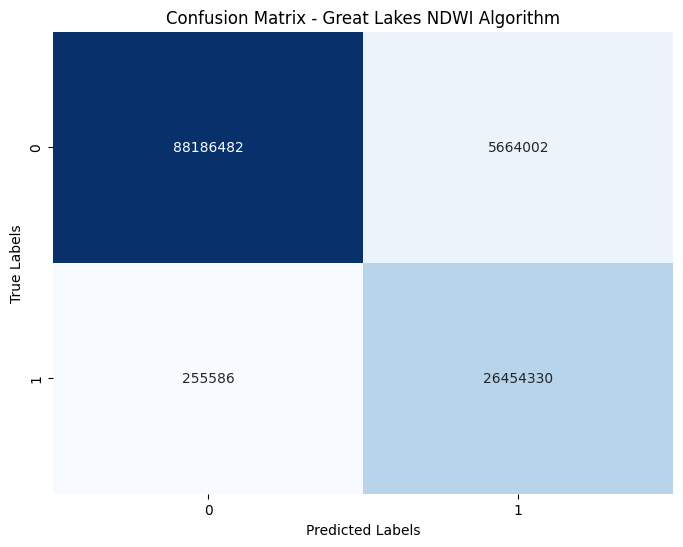

Accuracy: 0.95


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import cv2

## Data preprocessing ##

# Retrieval of values from NDWI mask (1 = water, 0 = land)
mask_ndwi = gl_mask_ndwi

# Retrieval of values from K-means mask (1 = water, 0 = land)
kmeans_results = gl_labels_image_traditional

## Analysis calculations ##

# Flatten the 2D arrays
ndwi_baseline = mask_ndwi.flatten()
kmeans_pred = kmeans_results.flatten()

# Compute confusion matrix
cm = confusion_matrix(ndwi_baseline, kmeans_pred)

# Calculate accuracy
accuracy = accuracy_score(ndwi_baseline, kmeans_pred)

# Display classification report
report = classification_report(ndwi_baseline, kmeans_pred)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Great Lakes NDWI Algorithm")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display accuracy
print(f"Accuracy: {accuracy:.2f}")

### SWI Evaluation

Side by side comparison of the two masks for visual reference:

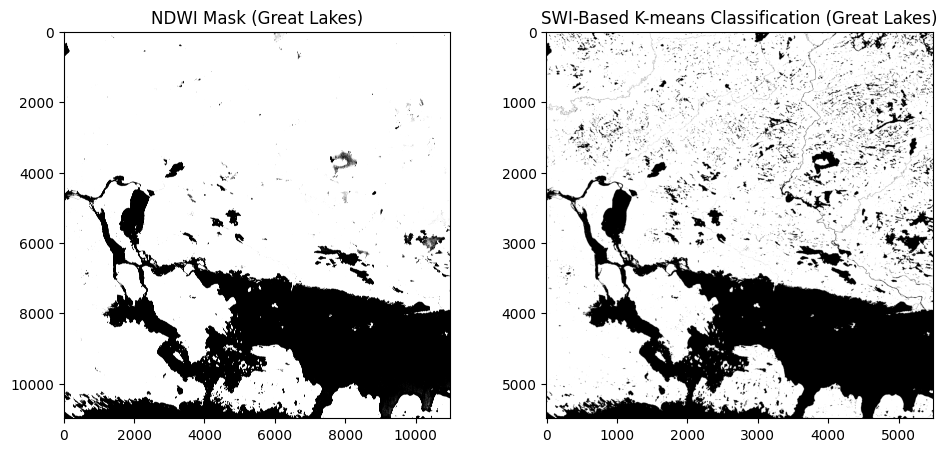

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(gl_mask_ndwi, cmap='binary')  # Plot on the first subplot (ax1)
ax1.set_title('NDWI Mask (Great Lakes)')

ax2.imshow(gl_labels_image_swi_flattened, cmap= 'binary')  # Plot on the second subplot (ax2)
ax2.set_title('SWI-Based K-means Classification (Great Lakes)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

Calculation of confusion matrix.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97  23419827
           1       0.84      0.99      0.91   6720273

    accuracy                           0.96  30140100
   macro avg       0.92      0.97      0.94  30140100
weighted avg       0.96      0.96      0.96  30140100



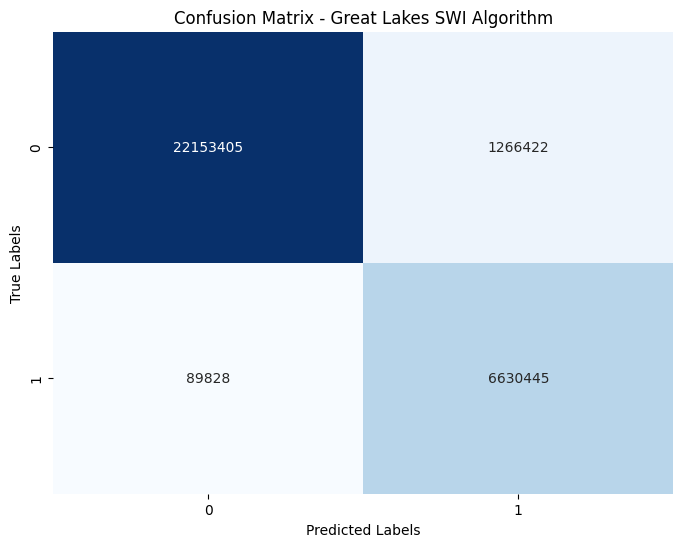

Accuracy: 0.96


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import cv2

## Data preprocessing ##

# Retrieval of values from NDWI mask (1 = water, 0 = land)
mask_ndwi_resized = cv2.resize(gl_mask_ndwi, dsize=(5490, 5490))

# Retrieval of values from K-means mask (0 = water, 1 = land) -- values must be flipped
kmeans_results = gl_labels_image_swi_flattened

## Analysis calculations ##

# Flatten the 2D arrays
ndwi_baseline = mask_ndwi_resized.flatten()
kmeans_pred = kmeans_results.flatten()

# Compute confusion matrix
cm = confusion_matrix(ndwi_baseline, kmeans_pred)

# Calculate accuracy
accuracy = accuracy_score(ndwi_baseline, kmeans_pred)

# Display classification report
report = classification_report(ndwi_baseline, kmeans_pred)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Great Lakes SWI Algorithm")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display accuracy
print(f"Accuracy: {accuracy:.2f}")

## Ganges Delta Region

In addition to the Great Lakes region, the SWI-based K-means algorithm will be run on the Ganges Delta. The water in this region is heavily silt-laden, which has historically caused issues for the NDWI. A k-means classification will be run on the bands used in the SWI under the hypothesis that such a choice will allow for better classification of water bodies in this region.

This is the data being read in as a usable format.

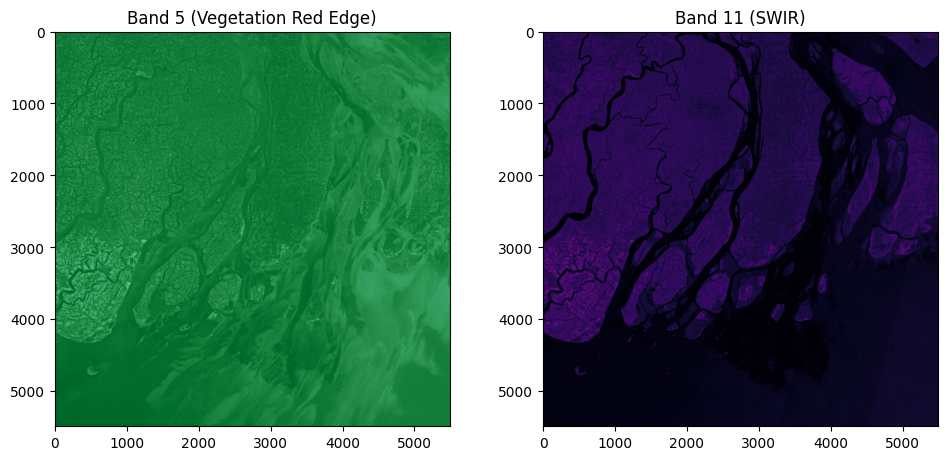

In [ ]:
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import reproject
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify file paths to the bands being used
m_bands_paths = {
    'B5': m_base_path + 'R20m/T46QBK_20240415T042711_B05_20m.jp2',
    'B11': m_base_path + 'R20m/T46QBK_20240415T042711_B11_20m.jp2'
}

# Read and stack the band images
m_band_data = []
for band in ['B5', 'B11']:
    with rasterio.open(m_bands_paths[band]) as src:
        m_band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
m_band_stack = np.dstack(m_band_data)
m_valid_data_mask = np.all(m_band_stack > 0, axis=2)

# Visual representation of bands
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(m_band_stack[:,:,0], cmap='BuGn_r')  # Plot on the first subplot (ax1)
ax1.set_title('Band 5 (Vegetation Red Edge)')

ax2.imshow(m_band_stack[:,:,1], cmap= 'inferno')  # Plot on the second subplot (ax2)
ax2.set_title('Band 11 (SWIR)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

The K-means algorithm is calculated below. Three clusters are used to fit the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


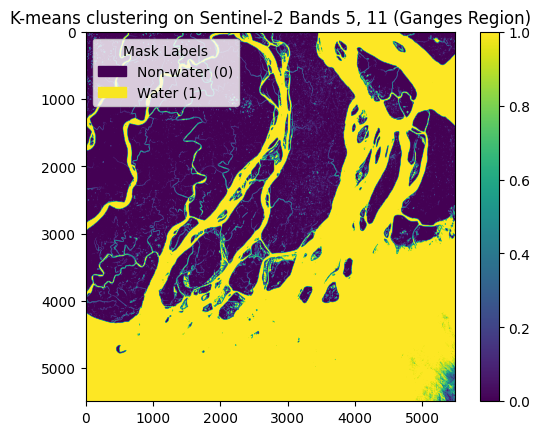

In [ ]:
# Reshape for K-means, only including valid data
m_X = m_band_stack[m_valid_data_mask].reshape((-1, 2))

# K-means clustering
m_kmeans = KMeans(n_clusters=3, random_state=0).fit(m_X)
m_labels = m_kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
m_labels_image_swi = np.full(m_band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
m_labels_image_swi[m_valid_data_mask] = m_labels

# Simplifying labels so that we only have water and non-water
m_labels_image_swi_flattened = np.where(m_labels_image_swi != 0, 0, 1)

# Plotting the result
# Create legend
patches = [
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0)),  # Patch for color at vmin
    Rectangle((0, 0), 1, 1, color=plt.cm.viridis(0.99)),  # Patch for color at vmax
]
labels = ['Non-water (0)', 'Water (1)']
plt.legend(patches, labels, loc='upper left', title='Mask Labels')

# Displaying image
plt.imshow(m_labels_image_swi_flattened, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands 5, 11 (Ganges Region)')
plt.colorbar()
plt.show()

## Ganges Performance Analysis

As before, a confusion matrix is utilised to compare the results of the k-means classification to the traditional NDWI index.

Side by side comparison of the two masks for visual reference:


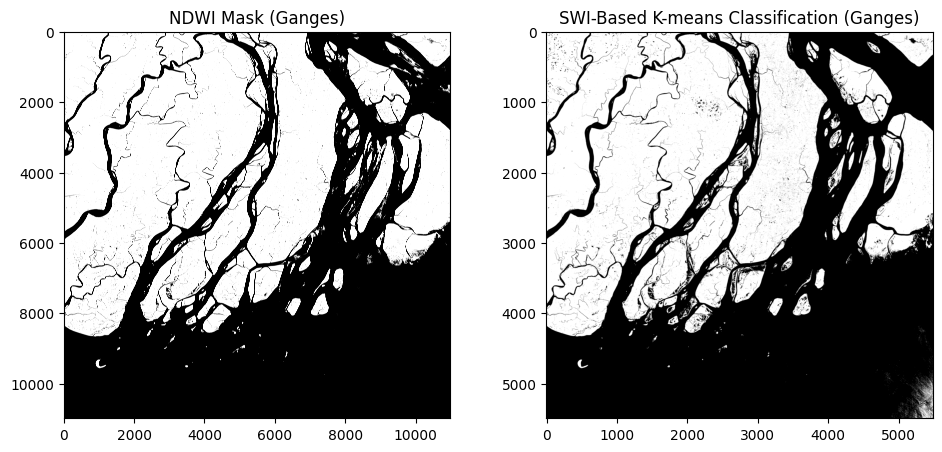

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(m_mask_ndwi, cmap='binary')  # Plot on the first subplot (ax1)
ax1.set_title('NDWI Mask (Ganges)')

ax2.imshow(m_labels_image_swi_flattened, cmap= 'binary')  # Plot on the second subplot (ax2)
ax2.set_title('SWI-Based K-means Classification (Ganges)')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97  15211864
           1       0.96      0.99      0.97  14928236

    accuracy                           0.97  30140100
   macro avg       0.97      0.97      0.97  30140100
weighted avg       0.97      0.97      0.97  30140100



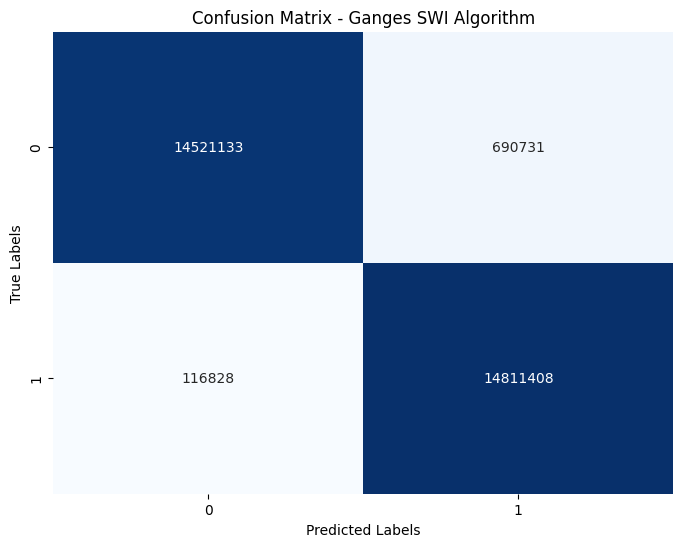

Accuracy: 0.97


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import cv2

## Data preprocessing ##

# Retrieval of values from NDWI mask (1 = water, 0 = land)
mask_ndwi_resized = cv2.resize(m_mask_ndwi, dsize=(5490, 5490))

# Retrieval of values from K-means mask (0 = water, 1 = land) -- values must be flipped
kmeans_results = m_labels_image_swi_flattened

## Analysis calculations ##

# Flatten the 2D arrays
ndwi_baseline = mask_ndwi_resized.flatten()
kmeans_pred = kmeans_results.flatten()

# Compute confusion matrix
cm = confusion_matrix(ndwi_baseline, kmeans_pred)

# Calculate accuracy
accuracy = accuracy_score(ndwi_baseline, kmeans_pred)

# Display classification report
report = classification_report(ndwi_baseline, kmeans_pred)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Ganges SWI Algorithm")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display accuracy
print(f"Accuracy: {accuracy:.2f}")

# Conclusions
The results of analysis show that both Great Lakes algorithms as well as the Ganges algorithm have a high accuracy when compared to the NDWI. This baseline demonstrates that k-means can match the performance of the NDWI. However, visual discrimination demonstrates that in some cases k-means performs better than the NDWI. In particular, note this example from the Ganges region using the SWI-based classification. Zooming into a portion of the image, it is apparent that the k-means classification outperformed the traditional NDWI index when looking at an area of water which was heavily sediment-laden. The streaks seen in the NWDI mask snapshot are areas of heavy sediment in the river which were incorrectly classifed by the NDWI.

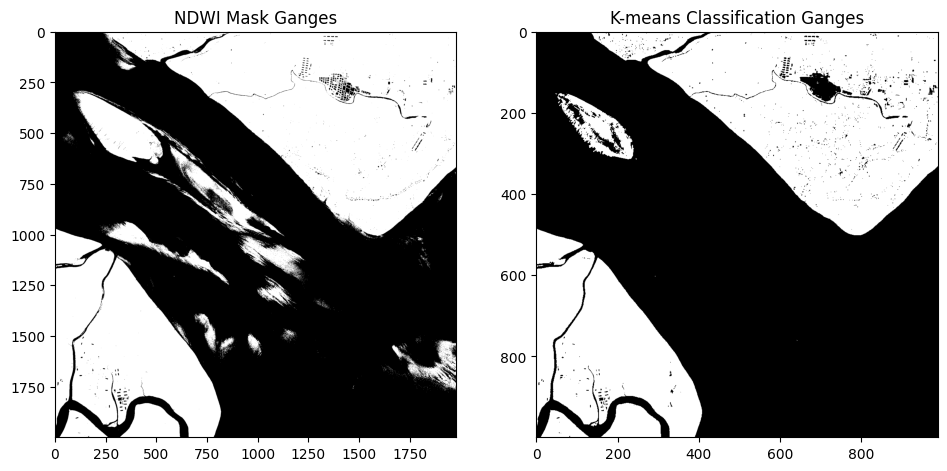

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

ax1.imshow(m_mask_ndwi[0:2000, 9000:11000], cmap='binary')  # Plot on the first subplot (ax1)
ax1.set_title('NDWI Mask Ganges')

ax2.imshow(m_labels_image_swi_flattened[0:1000, 4500:5500], cmap= 'binary')  # Plot on the second subplot (ax2)
ax2.set_title('K-means Classification Ganges')

plt.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

We can also read in the RGB bands from the Ganges dataset and post-process them to get a true colour image, which better demonstrates the difference in quality of these masks.

In [ ]:
# Image Quality Adjustment Function

max_r = 3.0 #3.0  # Max reflectance
mid_r = 0.13 # 0.13
sat = 2.0 # 1.2
gamma = 5 # 1.8
scalefac = 10000


def evaluate_pixel(smp):
  """
  Processes a single pixel based on provided bands.
  """
  rgb_lin = sat_enh(s_adj(smp[:,:,0]/scalefac), s_adj(smp[:,:,1]/scalefac), s_adj(smp[:,:,2]/scalefac))
  # rgb_lin = sat_enh((smp[:,:,0]/scalefac), (smp[:,:,1]/scalefac), (smp[:,:,2]/scalefac))
  # return rgb_lin
  return [s_rgb(rgb_lin[0]), s_rgb(rgb_lin[1]), s_rgb(rgb_lin[2])]

def s_adj(a):
  """
  Applies gamma adjustment after contrast enhancement.
  """
  return adj_gamma(adj(a, mid_r, 1, max_r))

g_off = 0.01
g_off_pow = g_off**gamma
g_off_range = (1 + g_off)**gamma - g_off_pow

def adj_gamma(b):
  """
  Applies gamma correction with offset.
  """
  return (b + g_off)**gamma - g_off_pow / g_off_range

# Saturation enhancement

def sat_enh(r, g, b):
  """
  Enhances saturation based on average value and factor.
  """
  avg_s = (r + g + b) / 3.0 * (1 - sat)
  return [clip(avg_s + r * sat), clip(avg_s + g * sat), clip(avg_s + b * sat)]

def clip(s):
  """
  Clips values to the range of 0 to 1.
  """
  s_1 = np.where(s > 1, 1, s)
  s_2 = np.where(s < 0, 0, s_1)
  return s_2

# Contrast enhancement with highlight compression

def adj(a, tx, ty, max_c):
  """
  Performs contrast enhancement with highlight compression.
  """
  ar = clip(a / max_c)
  return ar * (ar * (tx / max_c + ty - 1) - ty) / (ar * (2 * tx / max_c - 1) - tx / max_c)

def s_rgb(c):
  """
  Converts linear color value to sRGB equivalent.
  """
  return np.where(c <= 0.0031308, 12.92 * c, 1.055 * c**0.41666666666 - 0.055)


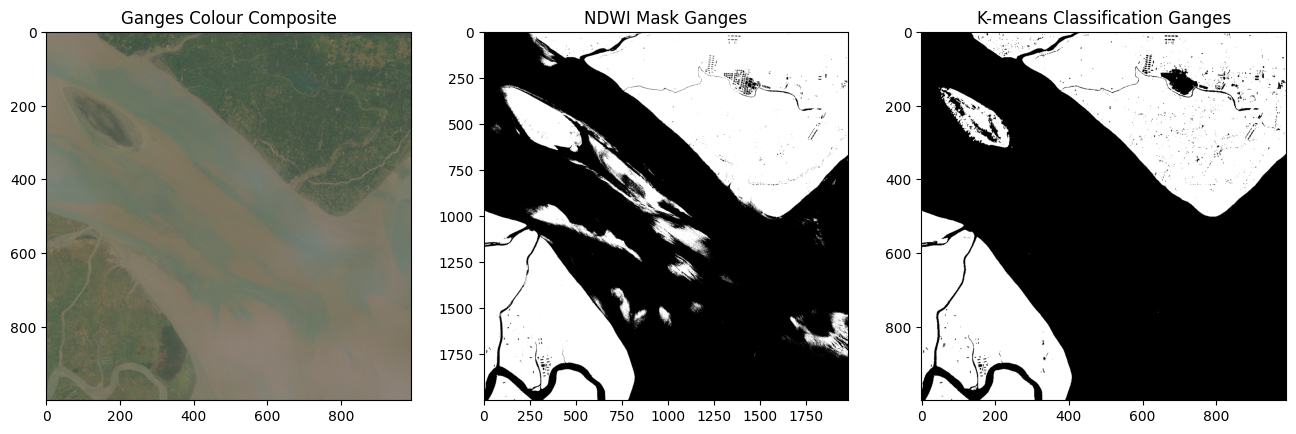

In [ ]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bands_paths = {
    'B2': m_base_path + 'R20m/T46QBK_20240415T042711_B02_20m.jp2',
    'B3': m_base_path + 'R20m/T46QBK_20240415T042711_B03_20m.jp2',
    'B4': m_base_path + 'R20m/T46QBK_20240415T042711_B04_20m.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
rgb_composite = np.dstack(band_data)

# Post-process image data
rgb_composite_new = np.dstack(evaluate_pixel(rgb_composite))


# Displaying Images

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)  # 1 row, 2 columns

ax1.imshow(rgb_composite_new[0:1000, 4500:5500, :], cmap='binary')  # Plot on the first subplot (ax1)
ax1.set_title('Ganges Colour Composite')

ax2.imshow(m_mask_ndwi[0:2000, 9000:11000], cmap='binary')  # Plot on the first subplot (ax1)
ax2.set_title('NDWI Mask Ganges')

ax3.imshow(m_labels_image_swi_flattened[0:1000, 4500:5500], cmap= 'binary')  # Plot on the second subplot (ax2)
ax3.set_title('K-means Classification Ganges')

fig.set_size_inches(16, 15)
plt.show()